In [1]:
from AssignmentQ2_Group5_D import * # Restart kernel if file changed
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from IPython.display import clear_output
clear_output(wait=True)
print("Selected case:", inp)
print('Success, obj:', model.ObjVal) if sol else print('Failed')


Set parameter Username
Set parameter LicenseID to value 2745896
Academic license - for non-commercial use only - expires 2026-11-27


GurobiError: Objective must be linear for multi-objective model

In [ ]:
if solved:
    # Extract solution
    solution = []
    for v in V:
        route = []
        for i in N:
            for j in N:
                if x_ijv[i, j, v].X > 0.5:
                    route.append((i, j))
        solution.append(route)
    
    print('\n'*2, 'Solution: ', solution, sep='')
    plt.figure(figsize=(12, 6))
    # Plotting points
    x_coords = [node_data[0].XCOORD]
    y_coords = [node_data[0].YCOORD]
    for n in node_data[1:]:
        x_coords.append(n.XCOORD)
        y_coords.append(n.YCOORD)
    plt.scatter(x_coords, y_coords, color='red')
    plt.text(node_data[0].XCOORD, node_data[0].YCOORD, 'Depot', fontsize=9, ha='right')
    for i, n in enumerate(node_data[1:], start=1):
        plt.text(n.XCOORD, n.YCOORD, f'{i}', fontsize=9, ha='right')


    # Plotting the routes put arrows between the nodes
    cmap = plt.get_cmap('tab10')

    for v, route in enumerate(solution):
        if not route:
            continue
        color = cmap(v % 10)
        plt.plot([], [], color=color, label=f'Vehicle {v+1}')
        ax = plt.gca()
        for i_idx, j_idx in route:
            x1, y1 = node_data[i_idx].XCOORD, node_data[i_idx].YCOORD
            x2, y2 = node_data[j_idx].XCOORD, node_data[j_idx].YCOORD
            if x1 == x2 and y1 == y2:
                continue
            arr = FancyArrowPatch((x1, y1), (x2, y2),
                                 arrowstyle='-|>', mutation_scale=12,
                                 color=color, linewidth=1.5,
                                 shrinkA=3, shrinkB=3)
            ax.add_patch(arr)

    plt.title('Vehicle Routes')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid()
    plt.show()

NameError: name 'solved' is not defined



Solution: [[(0, 20), (6, 9), (8, 0), (9, 11), (10, 8), (11, 10), (20, 6)], [(0, 5), (5, 14), (12, 0), (14, 15), (15, 16), (16, 12)], [(0, 17), (13, 18), (17, 13), (18, 19), (19, 0)], [(0, 3), (1, 7), (2, 1), (3, 2), (4, 0), (7, 4)]]


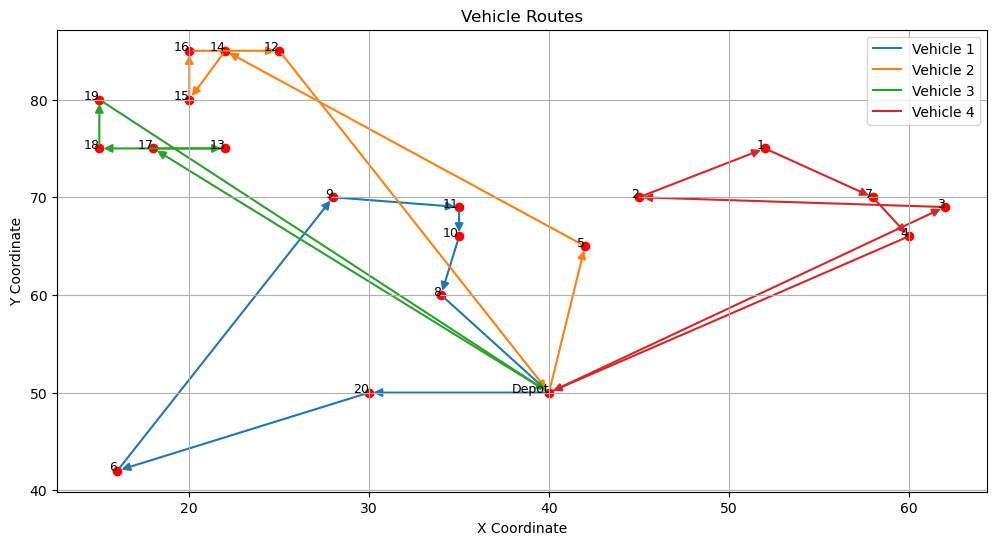

In [ ]:
solved = model.Status == GRB.OPTIMAL
if solved:
    # Extract solution
    solution = []
    for v in V:
        route = []
        for i in N:
            for j in N:
                if x_ijv[i, j, v].X > 0.5:
                    route.append((i, j))
        solution.append(route)
    
    print('\n'*2, 'Solution: ', solution, sep='')
    plt.figure(figsize=(12, 6))
    # Plotting points
    x_coords = [node_data[0].XCOORD]
    y_coords = [node_data[0].YCOORD]
    for n in node_data[1:]:
        x_coords.append(n.XCOORD)
        y_coords.append(n.YCOORD)
    plt.scatter(x_coords, y_coords, color='red')
    plt.text(node_data[0].XCOORD, node_data[0].YCOORD, 'Depot', fontsize=9, ha='right')
    for i, n in enumerate(node_data[1:], start=1):
        plt.text(n.XCOORD, n.YCOORD, f'{i}', fontsize=9, ha='right')


    # Plotting the routes put arrows between the nodes
    cmap = plt.get_cmap('tab10')

    for v, route in enumerate(solution):
        if not route:
            continue
        color = cmap(v % 10)
        plt.plot([], [], color=color, label=f'Vehicle {v+1}')
        ax = plt.gca()
        for i_idx, j_idx in route:
            x1, y1 = node_data[i_idx].XCOORD, node_data[i_idx].YCOORD
            x2, y2 = node_data[j_idx].XCOORD, node_data[j_idx].YCOORD
            if x1 == x2 and y1 == y2:
                continue
            arr = FancyArrowPatch((x1, y1), (x2, y2),
                                 arrowstyle='-|>', mutation_scale=12,
                                 color=color, linewidth=1.5,
                                 shrinkA=3, shrinkB=3)
            ax.add_patch(arr)

    plt.title('Vehicle Routes')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid()
    plt.show()



Solution in sequence: [[0, 20, 6, 9, 11, 10, 8, 0], [0, 5, 14, 15, 16, 12, 0], [0, 17, 13, 18, 19, 0], [0, 3, 2, 1, 7, 4, 0]]


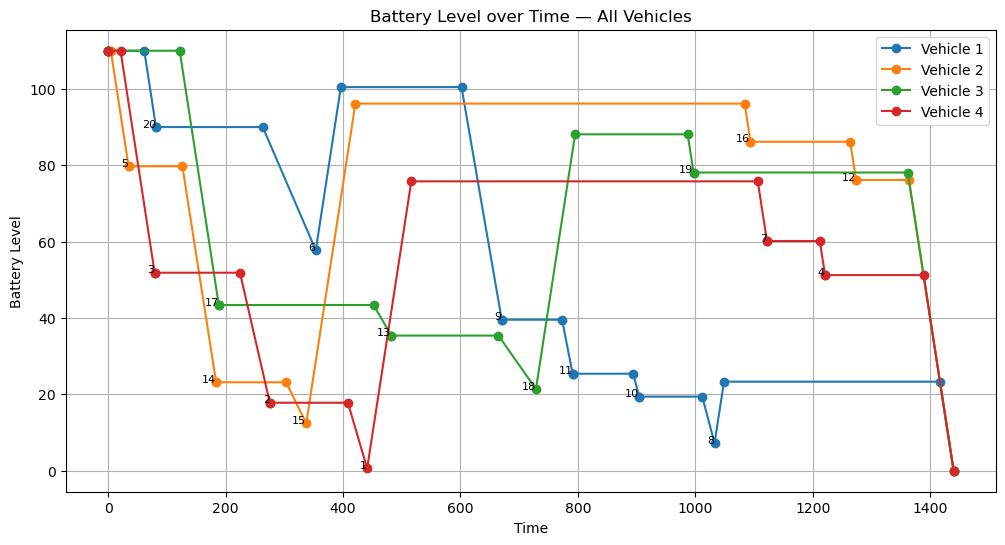



time of arrival: [81, 354, 670, 791, 904, 1033, 1440, 35, 184, 337, 1094, 1274, 1440, 188, 482, 729, 997, 1440, 79, 275, 441, 1122, 1221, 1440]


In [ ]:

if solved:
    solution = []
    for v in V:
        route = [0]
        i = 0
        # follow arcs from the depot until we return to depot or no outgoing arc is found
        while True:
            found = False
            for j in N:  # iterate only over valid node indices
                if x_ijv[i, j, v].X > 0.5:
                    if route[-1] != j:
                        route.append(j)
                    i = j
                    found = True
                    break
            # stop if no outgoing arc or we've returned to the depot
            if not found or i == 0:
                break
        solution.append(route)
    
    print('\n'*2, 'Solution in sequence: ', solution, sep='')

    # time of arrival, charging time, waiting time, battery level




plt.figure(figsize=(12, 6))
cmap = plt.get_cmap('tab10')
timeofarrival = []
for vehicle, route in enumerate(solution):
    
    if not route:
        continue
    timeofarrival_v = []
    time = []
    battery = []
    TEST =1
    for i in route[1:-1]:  # Exclude the last node to avoid index error
        if TEST==1:
            time.extend([
            0,
            0,
            tau_a_i[i].X - d[0][i] * s
            ])
            battery.extend([
            bm,
            bm,
            bm
            ])
            TEST=0

        timeofarrival_v.append(round(tau_a_i[i].X))
        time.extend([
            tau_a_i[i].X,
            tau_a_i[i].X + tau_c_i[i].X,
            tau_d_i[i].X
        ])
        battery.extend([
            beta_iv[i, vehicle].X,
            beta_iv[i, vehicle].X + tau_c_i[i].X * bc * bs[i],
            beta_iv[i, vehicle].X + tau_c_i[i].X * bc * bs[i]
        ])
        # print(f'Node {i}, Vehicle {round(vehicle)}: Time Arrival={round(tau_a_i[i].X)}, Charging Time={round(tau_c_i[i].X)}, Waiting Time={round(tau_w_i[i].X)}, Battery Level={round(beta_iv[i, vehicle].X)}, After Charging={round(beta_iv[i, vehicle].X + tau_c_i[i].X * bc * bs[i])}, charging station={bs[i]} ')
        plt.text(tau_a_i[i].X, beta_iv[i, vehicle].X, f'{i}', fontsize=8, ha='right')
        last_i = i
    timeofarrival_v.append(round(tau_d_i[last_i].X + d[last_i][0] * s))
    time.append(tau_d_i[last_i].X + d[last_i][0] * s)
    battery.append(beta_iv[last_i, vehicle].X     -    d[last_i][0] * s * bd  +  tau_c_i[last_i].X * bc * bs[last_i])
    timeofarrival.extend(timeofarrival_v)

    plt.plot(time, battery, marker='o', color=cmap(vehicle % 10), label=f'Vehicle {vehicle+1}')
plt.title(f'Battery Level over Time — All Vehicles')
plt.xlabel('Time')
plt.ylabel('Battery Level')
plt.legend()
plt.grid()
plt.show()

print('\n'*2,'time of arrival: ' , timeofarrival, sep='')





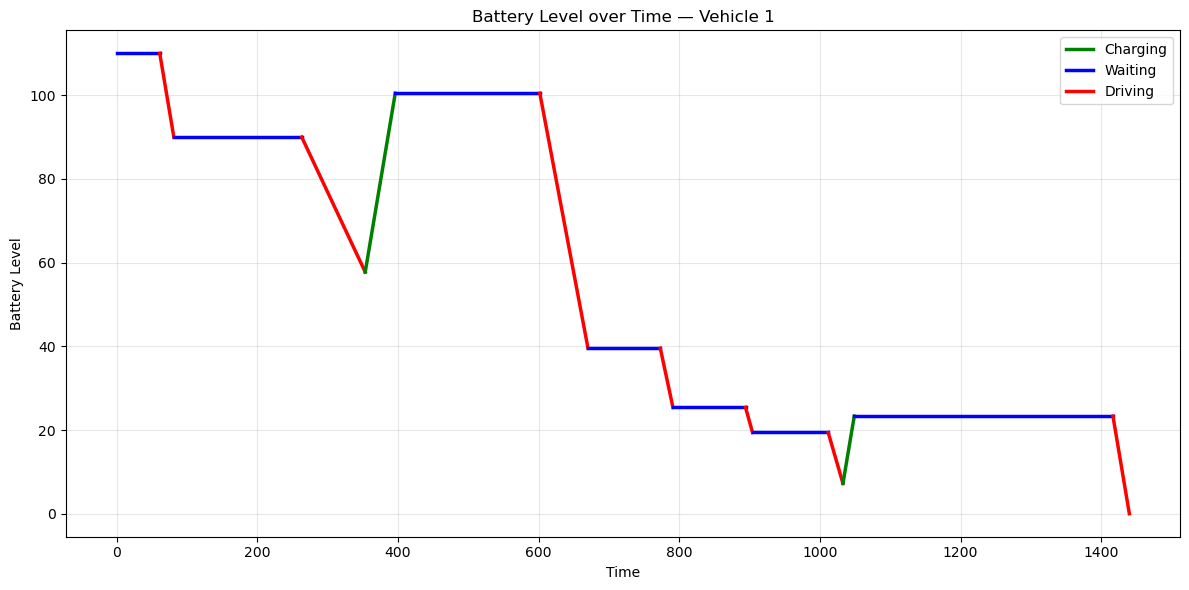

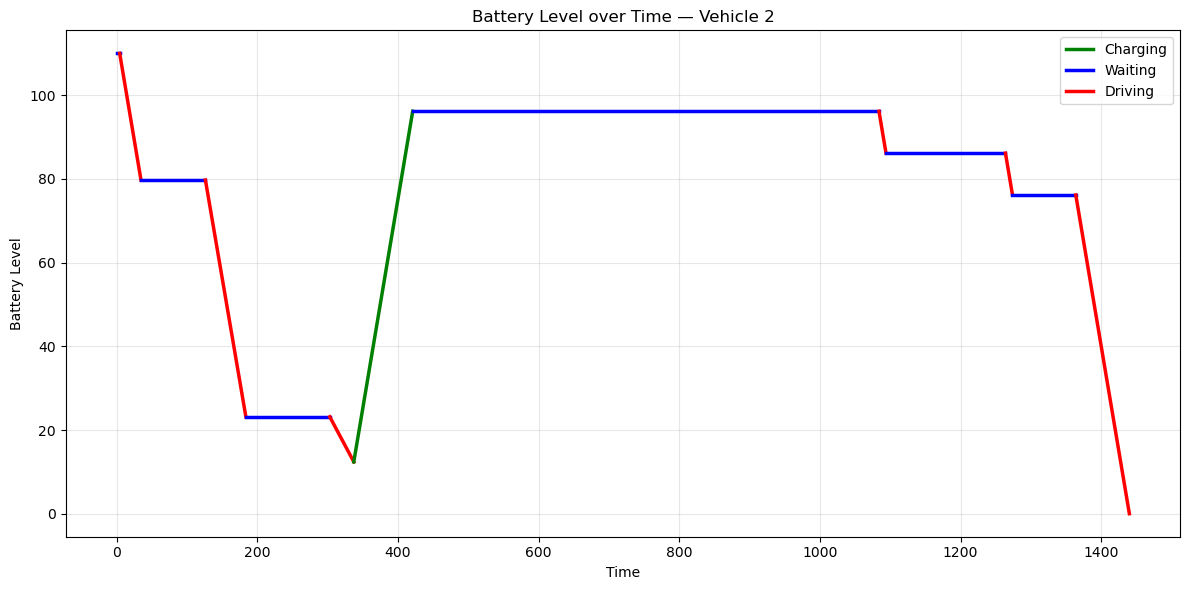

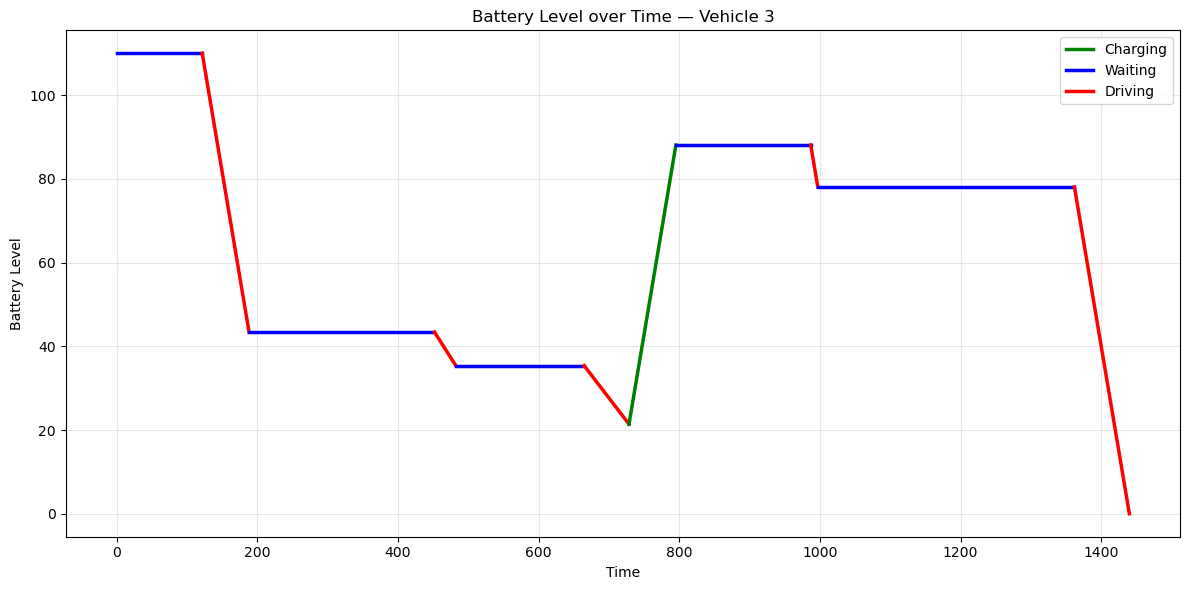

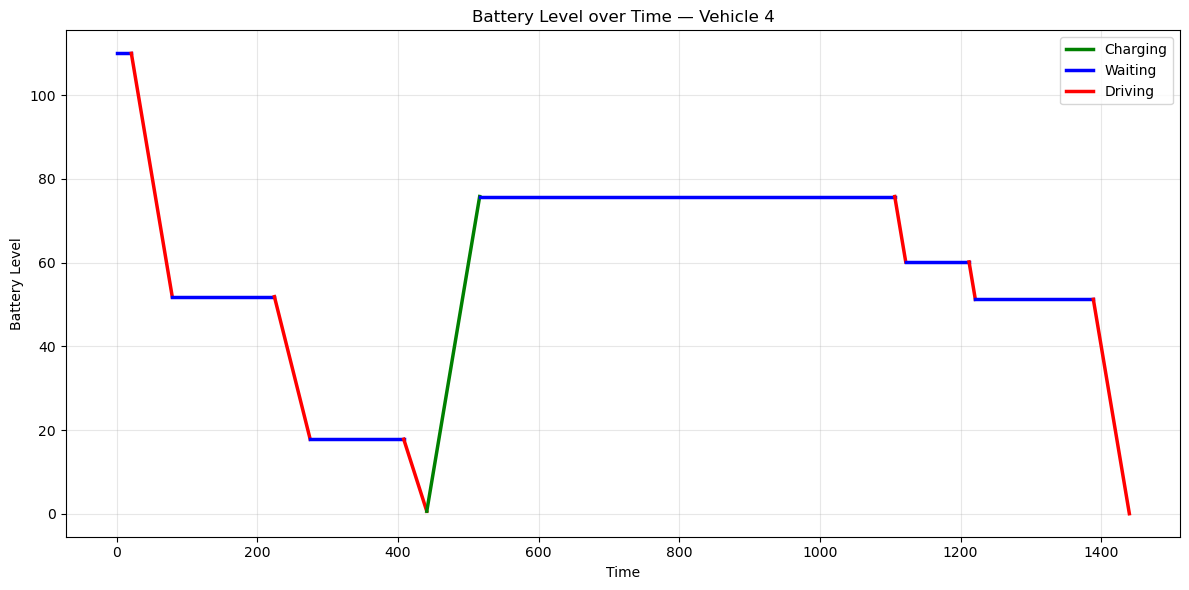

In [ ]:
cmap = plt.get_cmap('tab10')

for vehicle, route in enumerate(solution):
    if not route or len(route) < 3:
        continue
    
    plt.figure(figsize=(12, 6))#figsize=(12, 6)
    time = []
    battery = []
    TEST = 1
    
    # Build time and battery arrays (same as previous cell)
    for i in route[1:-1]:  # Exclude depot (first and last nodes)
        if TEST == 1:
            time.extend([0, 0, tau_a_i[i].X - d[0][i] * s])
            battery.extend([bm, bm, bm])
            TEST = 0
        
        time.extend([
            tau_a_i[i].X,
            tau_a_i[i].X + tau_c_i[i].X,
            tau_d_i[i].X
        ])
        battery.extend([
            beta_iv[i, vehicle].X,
            beta_iv[i, vehicle].X + tau_c_i[i].X * bc * bs[i],
            beta_iv[i, vehicle].X + tau_c_i[i].X * bc * bs[i]
        ])
    
    # Add final segment back to depot
    last_customer = route[-2]
    t_last_depart = tau_d_i[last_customer].X
    t_arrive_depot = t_last_depart + d[last_customer][0] * s
    b_last_depart = beta_iv[last_customer, vehicle].X + tau_c_i[last_customer].X * bc * bs[last_customer]
    b_arrive_depot = b_last_depart - d[last_customer][0] * s * bd
    
    time.extend([t_last_depart, t_arrive_depot])
    battery.extend([b_last_depart, b_arrive_depot])
    
    # Plot segments with color based on battery gradient
    for k in range(1, len(time)):
        t_prev, t_curr = time[k-1], time[k]
        b_prev, b_curr = battery[k-1], battery[k]
        
        # Determine color based on battery change (gradient)
        battery_diff = b_curr - b_prev
        
        if battery_diff > 0.01:  # Battery increasing = charging (green)
            color = 'green'
        elif abs(battery_diff) <= 0.01:  # Battery flat = waiting (blue)
            color = 'blue'
        else:  # Battery decreasing = driving (red)
            color = 'red'
        
        plt.plot([t_prev, t_curr], [b_prev, b_curr], color=color, linewidth=2.5)
    
    # Legend
    plt.plot([], [], color='green', linewidth=2.5, label='Charging')
    plt.plot([], [], color='blue', linewidth=2.5, label='Waiting')
    plt.plot([], [], color='red', linewidth=2.5, label='Driving')
    
    plt.title(f'Battery Level over Time — Vehicle {vehicle+1}')
    plt.xlabel('Time')
    plt.ylabel('Battery Level')
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()